
**1. 샘플링과 양자화**
여러 샘플링 비율 비교 + 양자화 단계 변화

컨볼루션 연산은 입력 이미지 속에서 커널(필터)과 비슷한 패턴을 발견했을 때 큰 값을 출력한다.

이게 **CNN·영상처리에서 “특징 추출(feature extraction)”의 핵심 원리**이다. <BR/>

컨볼루션은 **입력 이미지와 커널이 공간적으로 유사한 패턴을 가질 때 곱셈-합산 결과가 커지기 때문에** 해당 위치의 특징을 강하게 반응하는 구조이며, CNN은 이러한 반응을 이용해 의미 있는 특징을 학습한다.

# 1) `# 512x512 grayscale`

### 의미

camera 이미지는 **해상도 512×512의 흑백 이미지**라는 정보 제공.

### 필요성

이미지 실험에서 “해상도”가 핵심이기 때문에

샘플링/양자화 결과를 이해하려면

원본 크기를 알아야 함.

---

# 2) `# 여러 샘플링 비율 비교 + 양자화 단계 변화`

### 의미

이 코드 블록의 전체 목적을 요약.

### 필요성

본 실험이 **샘플링 비율 변화의 효과**와

**양자화 단계 변화의 효과**를 시각적으로 비교하는 목적임을 설명.

레포트 쓸 때 블록 전체의 의도 설명이 됨.

---

# 3) `# Sampling`

### 의미

바로 아래 반복문이 “샘플링 실험”이라는 섹션 구분.

### 필요성

코드를 보면 two for-loops가 나오는데

첫 번째는 샘플링, 두 번째는 양자화

구분을 확실하게 해주는 주석.

---

# 4) `# Quantization`

### 의미

두 번째 for-loop은 “양자화 실험”이라는 표시.

### 필요성

샘플링과 양자화는 전혀 다른 개념이므로

코드가 섞여 보이지 않도록 **블록 구조를 시각적으로 정리**.

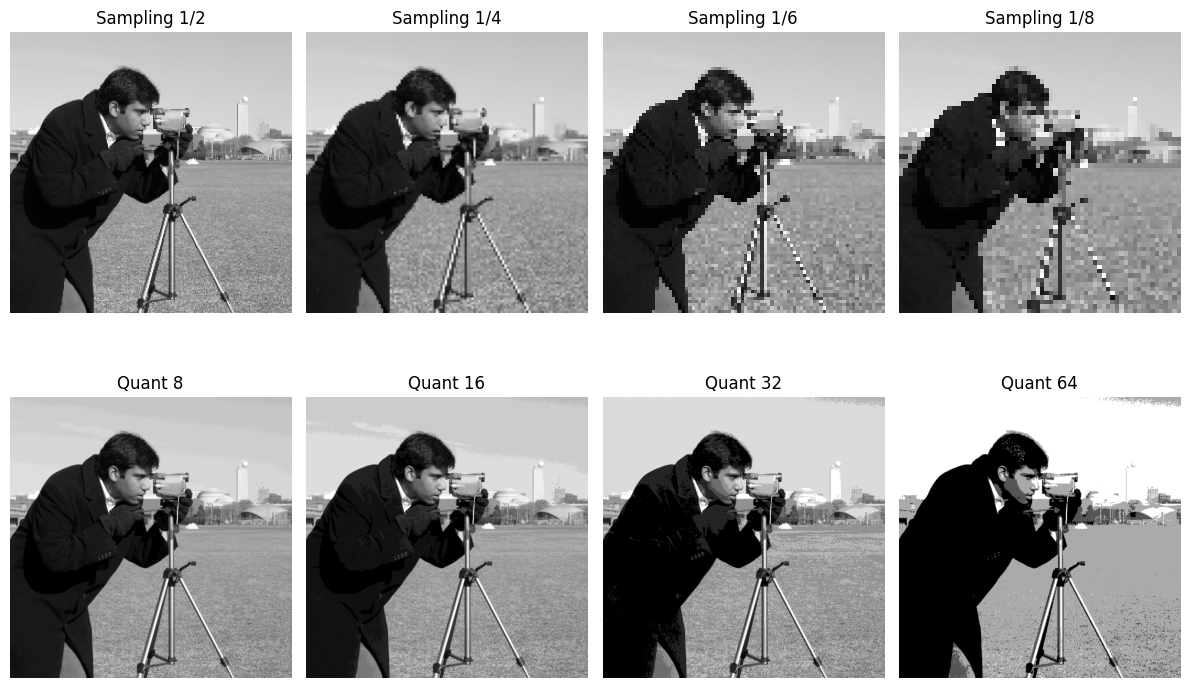

In [ ]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 이미지를 흑백으로 로드 (CV 실험에서 표준적으로 사용하는 camera 이미지)
# → 샘플링(해상도 감소) & 양자화(밝기 단계 감소) 실험에 적합.
img = data.camera()   # 512x512 grayscale
img = img.astype(np.uint8)

# 여러 비율로 다운샘플링 해볼 스케일 값들
# → 샘플링이 커질수록 어떤 정보 손실이 나는지 비교 목적.
scales = [2,4,6,8]

# 밝기 단계를 줄이는 양자화 레벨들
# → 계조(level) 수가 줄어들면 어떤 시각적 변화가 생기는지 확인.
quant_levels = [8,16,32,64]

plt.figure(figsize=(12,8))

# ----------------------------
# Sampling 실험 (해상도 줄이기)
# ----------------------------
for i, s in enumerate(scales):
    # s마다 픽셀을 하나씩 뽑는 방식 (sub-sampling)
    # → 이미지의 공간 정보를 일부러 제거해서 해상도 저하 효과 관찰 목적.
    down = img[::s, ::s]

    plt.subplot(2,4,i+1)
    plt.imshow(down, cmap='gray')
    plt.title(f"Sampling 1/{s}")  # 줄어든 해상도 확인
    plt.axis("off")

# ----------------------------
# Quantization 실험 (밝기 단계 줄이기)
# ----------------------------
for j, q in enumerate(quant_levels):
    # q 단위로 밝기를 뭉개는 방식 → 값의 정밀도를 의도적으로 낮추는 실험
    quant = (img // q) * q

    plt.subplot(2,4,4+j+1)
    plt.imshow(quant, cmap='gray')
    plt.title(f"Quant {q}")  # 밝기 단계가 줄어들수록 계단 현상 증가
    plt.axis("off")

plt.tight_layout()
plt.show()




1. 샘플링과 양자화
여러 샘플링 비율 비교 + 양자화 단계 변화

# 2) `# 여러 샘플링 비율 비교 + 양자화 단계 변화`

### 의미

이 코드 블록의 전체 목적을 요약.

### 필요성

본 실험이 **샘플링 비율 변화의 효과**와

**양자화 단계 변화의 효과**를 시각적으로 비교하는 목적임을 설명.

레포트 쓸 때 블록 전체의 의도 설명이 됨.

**2. 다양한 영상 차원 형태 이해**

In [ ]:
import numpy as np

# 다양한 영상 형태를 직접 만들어 shape 비교
# → 2D, 3D, 4D, hyperspectral 등 영상 데이터 구조 이해가 목적.
gray = np.zeros((256,256))            # (H,W)
rgb = np.zeros((256,256,3))           # (H,W,C)
depth = np.zeros((256,256,1))         # 깊이 정보 채널 1개
video = np.zeros((30,256,256,3))      # (F,H,W,C)
hyper = np.zeros((256,256,31))        # 31개 스펙트럼 밴드

gray.shape, rgb.shape, video.shape, hyper.shape


((256, 256), (256, 256, 3), (30, 256, 256, 3), (256, 256, 31))

**3. RGB 채널 분리 실험**

# 5) `# 1. Color 이미지 로드 (인터넷 불필요)`

### 의미

astronaut 이미지는 skimage 내부에 있어서

인터넷이 필요 없다는 정보.

### 필요성

colab, 서버 환경에서 코드 실행 시

인터넷 연결 여부가 중요할 때 오해 방지.

---

# 6) `# shape: (H, W, 3)`

### 의미

RGB 이미지의 shape 구조(높이·너비·채널 수)를 설명.

### 필요성

RGB 채널 분리 실험의 핵심이 “shape”이기 때문에

이 정보를 주석으로 달면 구조 이해가 쉬워짐.

---

# 7) `# RGB 채널 분리`

### 의미

바로 아래 코드가 Red, Green, Blue 채널을 나누는 작업임을 알리는 주석.

### 필요성

실험 목적: “3채널 색상 이미지가 어떻게 분리되는가”를 보여주는 코드라는 걸 알려주는 역할.

Image shape: (512, 512, 3)


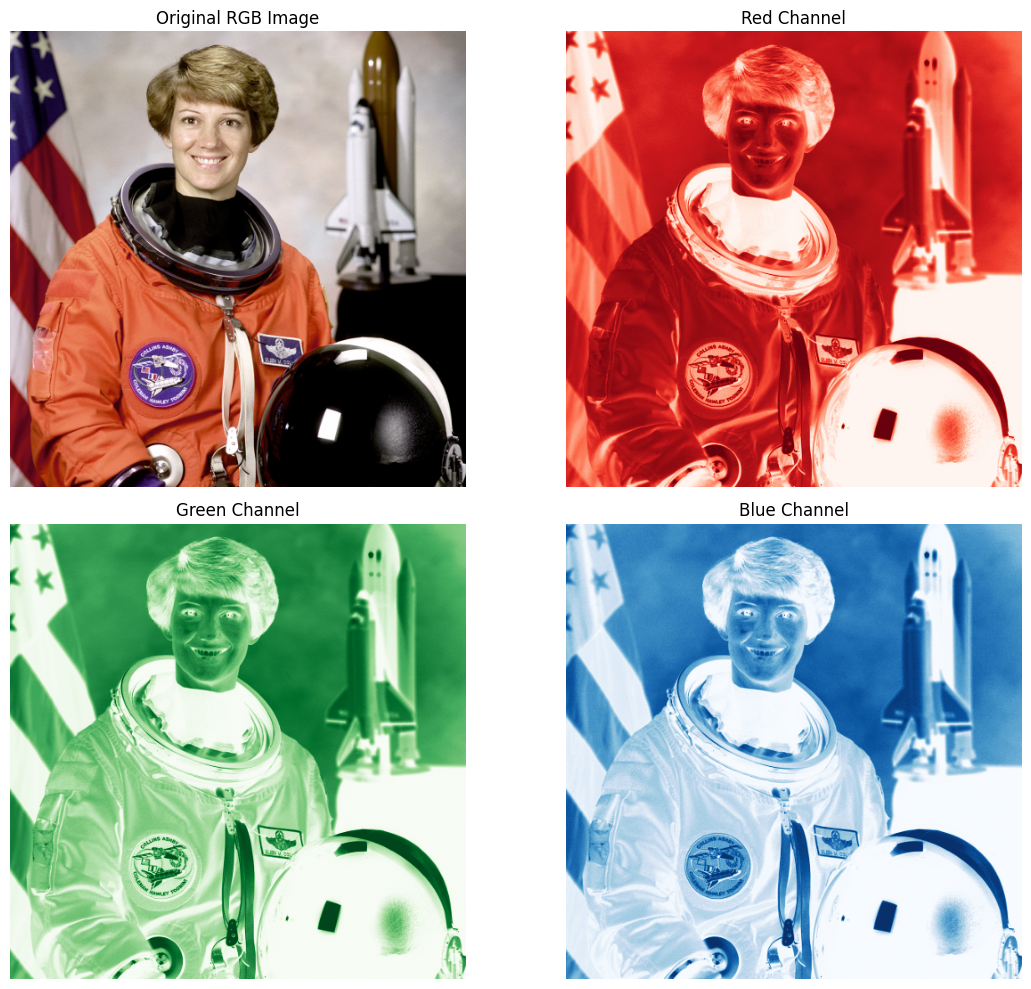

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# color 이미지 로드 (인터넷 없이 가능)
# → RGB 채널 구조를 분해해서 직접 눈으로 비교하는 실험.
img = data.astronaut()   # (H,W,3)
print("Image shape:", img.shape)

# 채널 분리
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(G, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(B, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


**4.Fully Connected Layer 실험 (MNIST)**

# 8) `# Fully Connected Layer (MNIST 분류 예제)`

### 의미

이 블록이 CNN이 아니라

**완전연결(FC) 구조**를 보여준다는 알림.

### 필요성

CNN vs FC 차이를 배울 때 아주 중요한 개념 구분.

---

# 9) `# Input shape: torch.Size([784])`

(코드 출력 결과이지만 설명 역할)

### 의미

MNIST 28×28 = 784 픽셀을 flatten하면

FC layer의 입력이 된다는 사실을 강조.

### 필요성

“왜 flatten 해야 하는가?” 의도를 명확히 해줌.

In [ ]:
import torch, torch.nn as nn
from torchvision import datasets, transforms

# MNIST 로드 → (28x28) 숫자 이미지
mnist = datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor())

# 샘플 이미지 확인
x, y = mnist[0]
print("Input shape:", x.view(-1).shape)
# → FC layer는 2D 이미지를 flatten 해야 함을 확인

# FC Layer 테스트: 입력 784 → 출력 10클래스
fc = nn.Linear(28*28, 10)
out = fc(x.view(1,-1))
out  # 랜덤 초기화된 FC layer 출력

Input shape: torch.Size([784])


tensor([[ 0.1611,  0.0115,  0.2143,  0.1318, -0.0771, -0.1824,  0.0537,  0.0281,
          0.2025, -0.1657]], grad_fn=<AddmmBackward0>)

**5. Moving Average (1D 신호 smoothing)**

# 10) `# 여러 window 크기 비교`

### 의미

1D moving average에서

window 3, 7, 15, 30의 smoothing 효과 비교.

### 필요성

신호처리 개념을 시각적으로 이해하게 해주는 핵심 포인트.

---

# 11) `# 다양한 window(size)로 moving average 적용`

### 의미

2D 이미지에서 박스 필터(평균 필터)가 어떻게 작동하는지 비교.

### 필요성

Kernel size 변화 → blur 강도 변화

이 실험을 설명하는 주석으로 매우 적합.


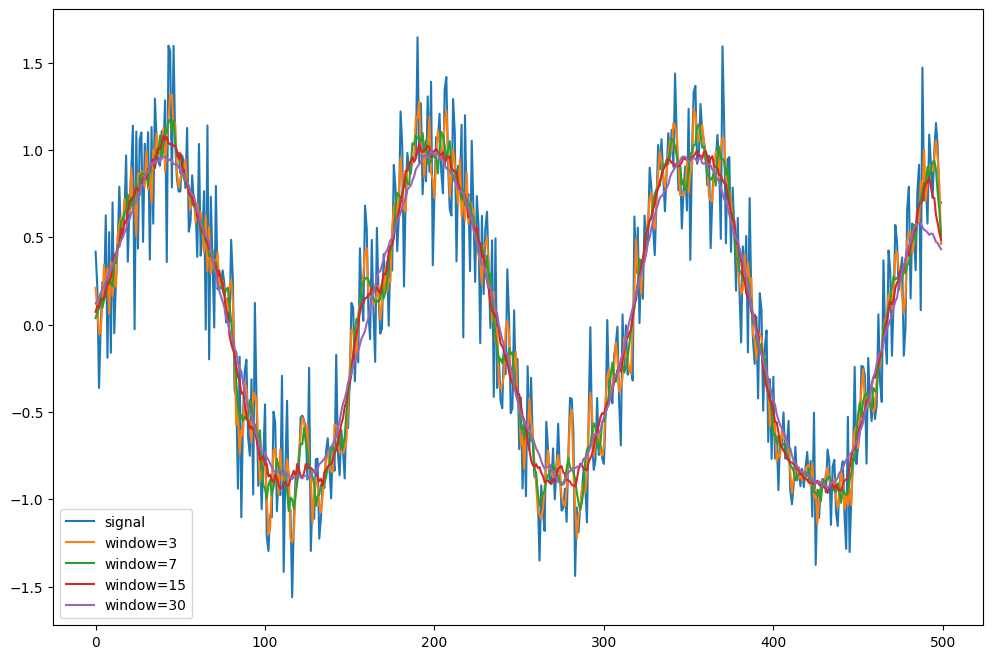

In [9]:
t = np.linspace(0,20,500)
# 노이즈 섞인 sin 파형 → 필터링 효과 확인 목적
signal = np.sin(t) + np.random.randn(500)*0.3

plt.figure(figsize=(12,8))
plt.plot(signal,label="signal")

# 여러 window 크기로 평균 필터 비교
for w in [3,7,15,30]:
    kernel = np.ones(w)/w  # moving average kernel
    ma = np.convolve(signal,kernel,'same')
    plt.plot(ma,label=f"window={w}")

plt.legend(); plt.show()


**6. Moving Average (2D 이미지 smoothing)**

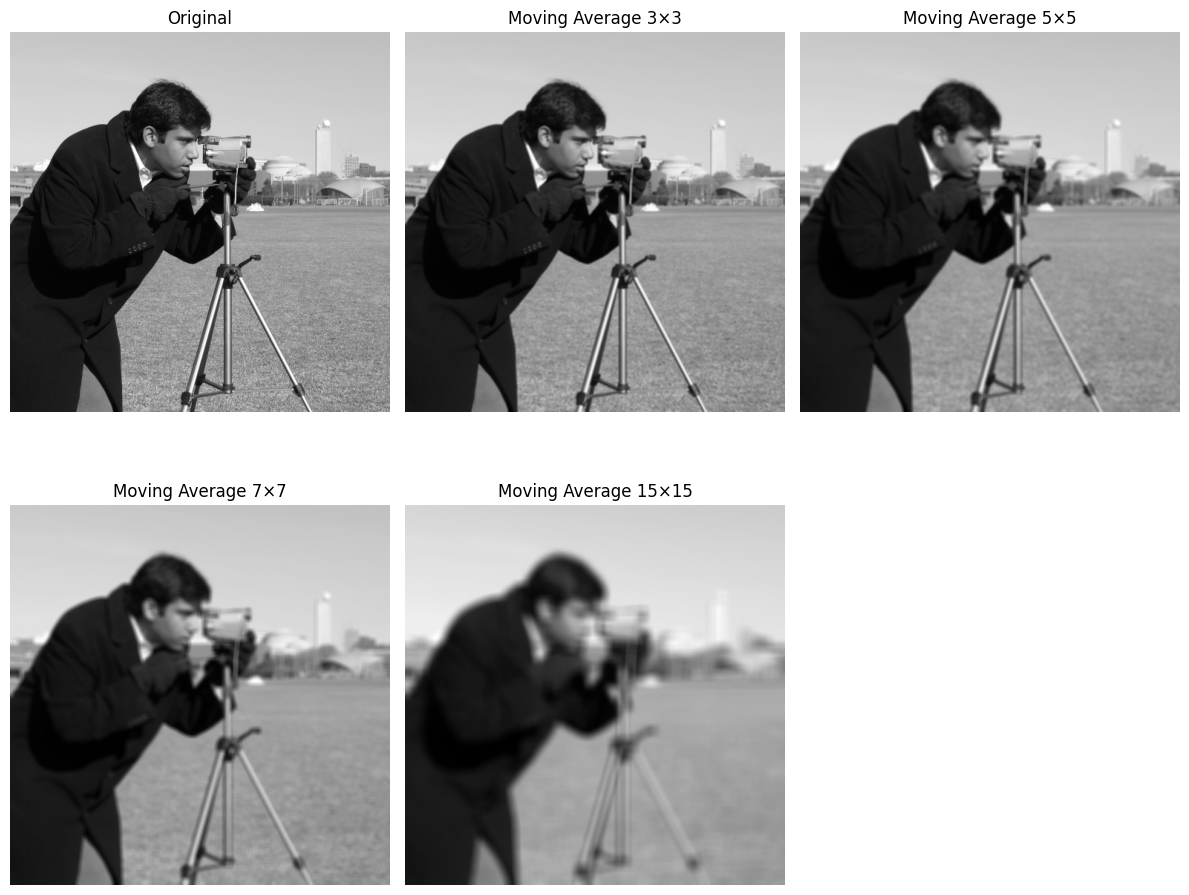

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import cv2

# Smoothing 효과 비교를 위한 예제 이미지
img = data.camera().astype(np.uint8)

kernel_sizes = [3, 5, 7, 15]

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, k in enumerate(kernel_sizes):
    # box blur → kernel 크기 커질수록 blur 증가
    kernel = np.ones((k, k), np.float32) / (k*k)
    smoothed = cv2.filter2D(img, -1, kernel)

    plt.subplot(2,3,i+2)
    plt.imshow(smoothed, cmap='gray')
    plt.title(f"Moving Average {k}×{k}")
    plt.axis("off")

plt.tight_layout()
plt.show()


**7. 노이즈 + 필터 효과 비교**

# 12) `# 1. 원본 이미지 로드`

### 의미

noise 실험에서 사용되는 원본 이미지 로드.

### 필요성

노이즈와 비교하기 위해 원본이 반드시 필요하기 때문.

---

# 13) `# 2. 노이즈 추가`

### 의미

Gaussian Noise + Salt & Pepper Noise 실험의 핵심.

### 필요성

각 노이즈의 성질(가우시안 vs 소금후추)을 비교하기 위한 준비 단계임을 설명.

---

# 14) `# float → uint8 변환`

### 의미

skimage의 random_noise는 float64로 나오기 때문에

OpenCV에서 쓰려면 uint8로 변환해야 한다는 의미.

### 필요성

변환 안 하면 filter2D, medianBlur 등이 동작 안 함.

실제로 이 부분을 모르면 초보자들이 가장 많이 오류 냄.

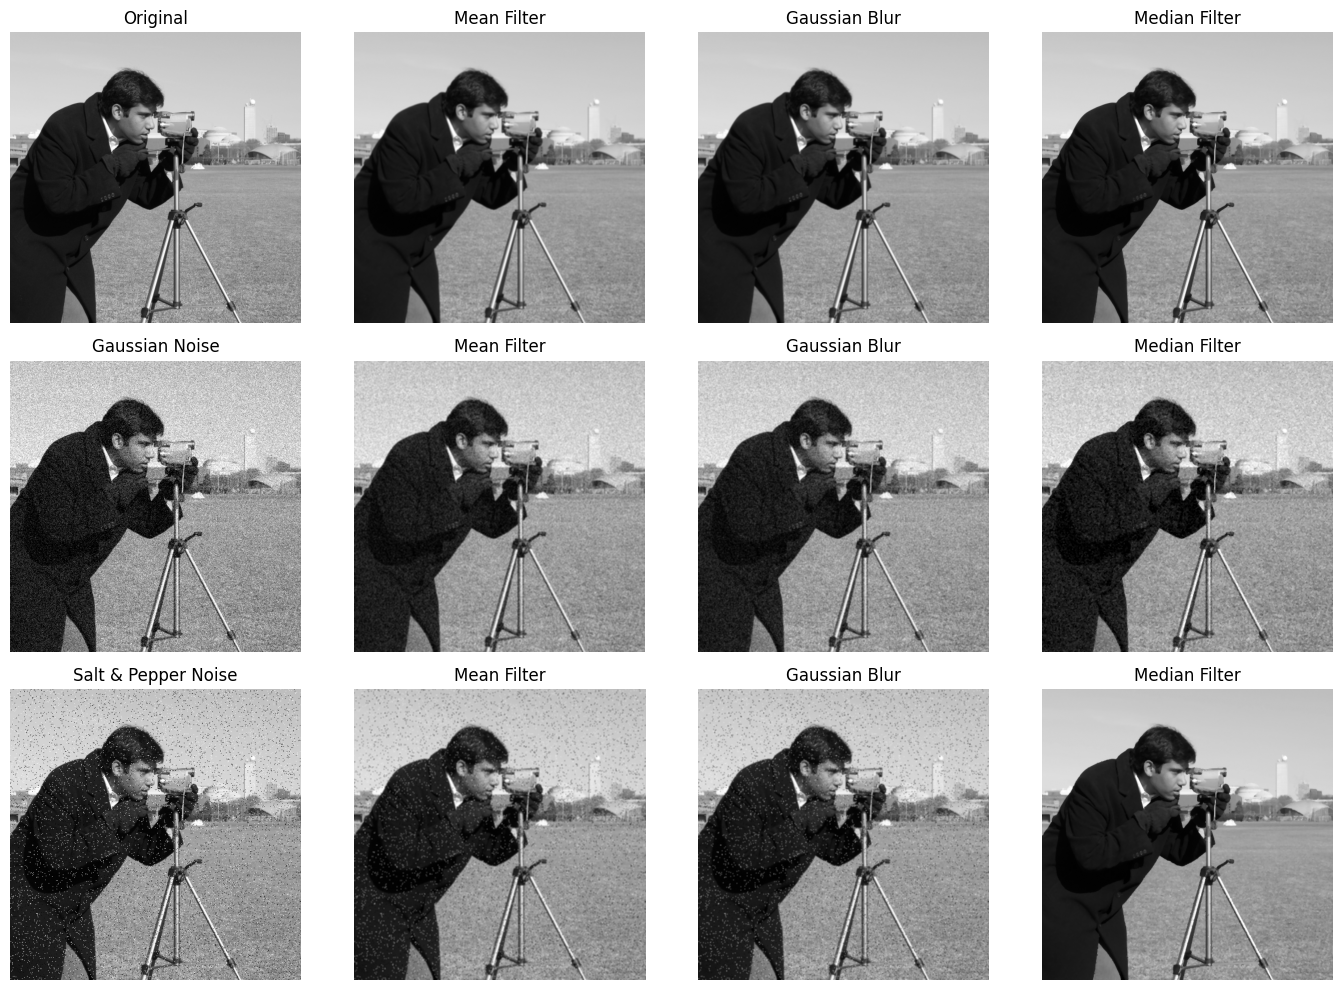

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util
import cv2

# 원본 이미지
img = data.camera().astype(np.uint8)

# Gaussian Noise + Salt & Pepper Noise 추가
# → 어떤 노이즈에 어떤 필터가 적합한지 비교 실험 목적
gaussian_noise = util.random_noise(img, mode='gaussian', var=0.01)
sp_noise = util.random_noise(img, mode='s&p', amount=0.05)

# skimage noise는 float64이므로 다시 uint8로 변환
def to_uint8(x):
    return (x * 255).astype(np.uint8)

gaussian_noise = to_uint8(gaussian_noise)
sp_noise = to_uint8(sp_noise)

# 필터 정의
def mean_filter(x):        # 단순 평균 — blur 강하지만 엣지 손상 큼
    return cv2.filter2D(x, -1, np.ones((3,3))/9)

def gaussian_blur(x):      # Gaussian 노이즈에 최적
    return cv2.GaussianBlur(x, (3,3), 1)

def median_filter(x):      # salt & pepper 노이즈 제거에 최강
    return cv2.medianBlur(x, 3)

filters = [mean_filter, gaussian_blur, median_filter]
filter_names = ["Mean Filter", "Gaussian Blur", "Median Filter"]

plt.figure(figsize=(14,10))

# ---- 1행: 원본 필터링 비교 ----
plt.subplot(3,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, f in enumerate(filters):
    out = f(img)
    plt.subplot(3,4,2+i)
    plt.imshow(out, cmap='gray')
    plt.title(filter_names[i])
    plt.axis("off")

# ---- 2행: Gaussian Noise ----
plt.subplot(3,4,5)
plt.imshow(gaussian_noise, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")

for i, f in enumerate(filters):
    out = f(gaussian_noise)
    plt.subplot(3,4,6+i)
    plt.imshow(out, cmap='gray')
    plt.title(filter_names[i])
    plt.axis("off")

# ---- 3행: Salt & Pepper Noise ----
plt.subplot(3,4,9)
plt.imshow(sp_noise, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

for i, f in enumerate(filters):
    out = f(sp_noise)
    plt.subplot(3,4,10+i)
    plt.imshow(out, cmap='gray')
    plt.title(filter_names[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# 15) `# 필터 함수들`

### 의미

mean, gaussian, median 각각 함수를 정의하는 블록.

### 필요성

필터를 함수화하면

노이즈 종류별로 반복해서 쉽게 적용 가능.

---

# 16) `# 시각화: 3행 × 4열`

### 의미

이미지를 12개 형태로 정렬해 보여주는 레이아웃 설명.

### 필요성

보는 사람이 “왜 12개의 이미지가 있는가?”를 쉽게 이해함.

---

# 17) `# 원본 + 필터 결과`

### 의미

1행=원본(Original)

2행=Gaussian Noise

3행=Salt & Pepper Noise

라고 지정해놓은 구조의 첫줄 설명.

### 필요성

시각화를 구조적으로 해석하는 데 도움.

---

# 18) `# 3행 : Salt & Pepper Noise + 필터 결과`

### 의미

노이즈 종류별로 필터 성능을 비교한다는 주석.

### 필요성

Salt & Pepper는 median 필터가 best인데

그 현상을 직관적으로 설명할 때 매우 중요.

**8. Edge Detection 실험**

# 19) `# Edge Detection (Sobel, Prewitt, Laplacian, Canny)`

### 의미

엣지 검출 실험 전체를 요약.

### 필요성

CNN 필터와 전통 영상처리를 연결하는 중간 단계.

---

# 20) `# 1) Cameraman 이미지 불러오기`

### 의미

엣지 테스트용 전형적인 grayscale 이미지.

### 필요성

엣지 구조(명암 대비)가 잘 살아 있기 때문에 edge 실험에 딱 맞음.

---

# 21) `# 3) Prewitt manually 구현`

### 의미

OpenCV에 직접 함수가 없는 Prewitt을

수동 구현한다는 설명.

### 필요성

“엣지 필터는 커널 값의 곱셈으로 직접 만들 수 있다”는 교육적 목적.

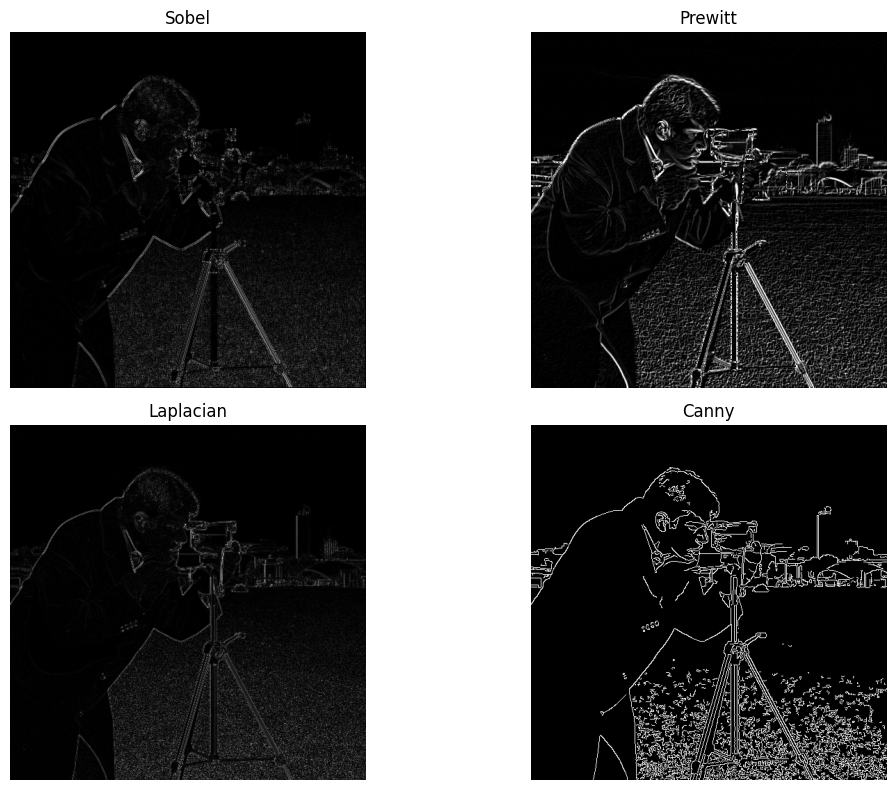

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import cv2

img = data.camera().astype(np.uint8)

# Sobel — 1차 미분
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1)
sobel = np.abs(sobel)
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Laplacian — 2차 미분
lap = cv2.Laplacian(img, cv2.CV_64F)
lap = np.abs(lap)
lap = cv2.normalize(lap, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Canny — 실무에서 가장 활용되는 엣지 검출
canny = cv2.Canny(img, 100, 200)

# Prewitt (직접 구현)
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

prew = cv2.filter2D(img, -1, kernelx) + cv2.filter2D(img, -1, kernely)

plt.figure(figsize=(12,8))
titles=["Sobel", "Prewitt", "Laplacian", "Canny"]
results = [sobel, prew, lap, canny]

for i, res in enumerate(results):
    plt.subplot(2,2,i+1)
    plt.imshow(res, cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


**9. Sharpen 필터 비교**

# 22) `# Sharpen 필터 여러 종류 비교`

### 의미

세 가지 sharpening kernel의 비교 실험.

### 필요성

high-frequency 강조가 어떻게 나타나는지 비교하기 위함.

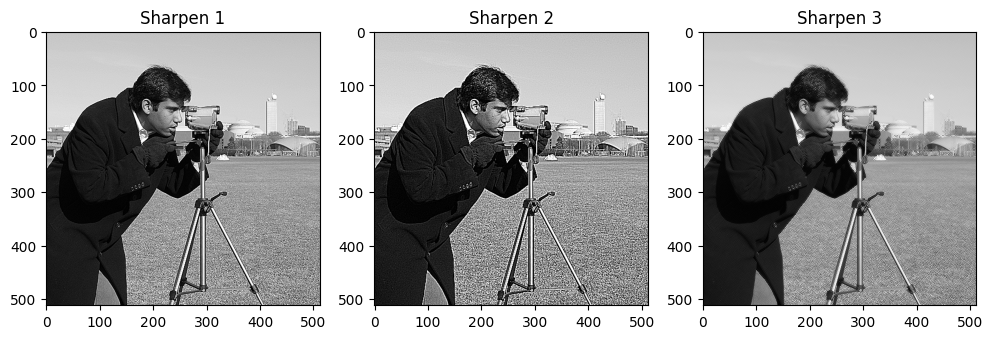

In [17]:
kernels = [
    # [Sharpen Kernel 1]
    # 기본적인 "언샤프 마스크" 형태의 샤픈 커널.
    # 중앙 값이 5로 크고 주변이 -1이라서
    # → 중앙 픽셀은 더 강조, 주변 픽셀은 억제
    # 결과적으로 high-frequency(엣지/디테일) 강조.
    np.array([[0, -1,  0],
              [-1, 5, -1],
              [0, -1,  0]]),

    # [Sharpen Kernel 2]
    # 훨씬 공격적인 샤프닝 커널.
    # 중앙 값이 9라 강조가 강하고,
    # 주변이 -1로 전체적인 high-pass 성질이 큼.
    # → 노이즈까지 많이 강조되므로 강한 샤프 효과.
    np.array([[-1, -1, -1],
              [-1,  9, -1],
              [-1, -1, -1]]),

    # [Sharpen Kernel 3]
    # 엣지 강조와 directional 성질이 섞인 고급 샤픈 커널.
    # 1, -2, 5 조합이 있어서 수평/수직 방향 엣지를 더 뚜렷하게 키움.
    # → 선명도는 높지만 왜곡도 생길 수 있는 필터.
    np.array([[ 1, -2,  1],
              [-2,  5, -2],
              [ 1, -2,  1]])
]


plt.figure(figsize=(12,8))
for i,k in enumerate(kernels):
    # sharpening은 high-frequency를 강조
    out = cv2.filter2D(img, -1, k)
    plt.subplot(1,3,i+1); plt.imshow(out,cmap='gray'); plt.title(f"Sharpen {i+1}")
plt.show()


# 23) `# Box Blur (Kernel size 변화)`

### 의미

Box Blur는 아주 단순한 평균 필터임을 알려줌.

### 필요성

Kernel size 증가 → blur 증가라는 직관적 이해.

---

# 24) `# Gaussian Blur (sigma 변화)`

### 의미

Gaussian smoothing에서 **sigma 변화**가 blur 강도를 결정한다는 핵심.

### 필요성

실제 영상처리에서 sigma는 blur 정도를 정교하게 조절함.

---

# 25) `# 다양한 패딩 모드 + 효과 비교`

### 의미

Zero / Constant / Reflect / Edge padding 비교를 설명하는 주석.

### 필요성

CNN의 padding 개념을 직관적으로 습득할 수 있음.

reflect 패딩이 가장 자연스러운 이유도 여기서 확인 가능.

---

# 26) `# Zero Padding`

### 의미

가장 기본적인 padding 방식.

### 필요성

CNN에서 conv를 할 때 많이 사용되는 방식.

---

# 27) `# Reflect Padding`

### 의미

이미지 경계를 반사하는 방식.

### 필요성

가장 artifact가 적은 패딩 → 실무에서도 많이 사용.

---

# 28) `# Edge Padding`

### 의미

가장자리 값 그대로 확장.

### 필요성

경계 보존에 유리한 패딩.

**10. Box Blur (kernel size 변화)**

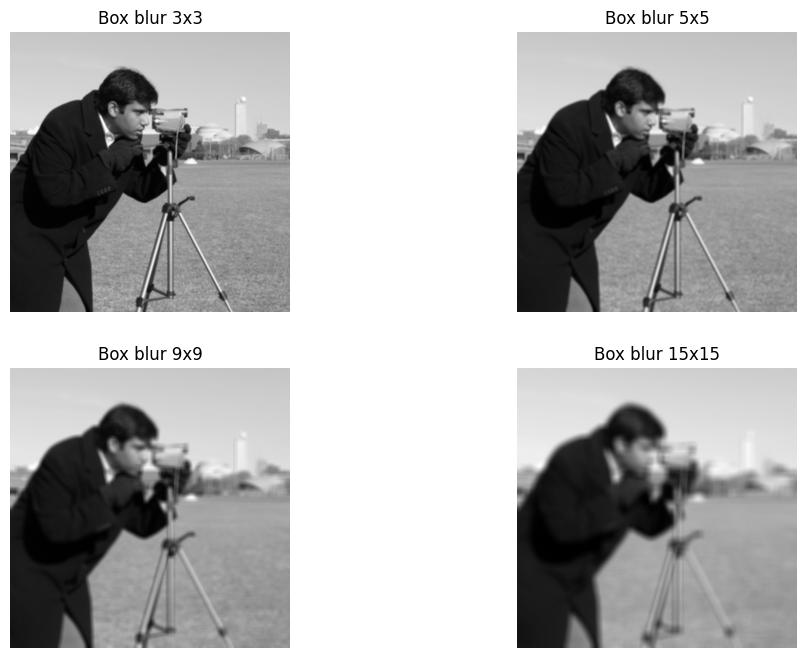

In [18]:
plt.figure(figsize=(12,8))
# 전체 그림 크기 설정 (이미지가 4개니까 가로/세로 적절하게 배치)

for i, k in enumerate([3, 5, 9, 15]):
    # k: 박스 필터의 kernel 크기 (3x3, 5x5, 9x9, 15x15) enumerate(열거하다)
    # → 커질수록 더 넓게 평균을 내기 때문에 blur 강도가 증가함.

    kernel = np.ones((k, k)) / k**2   6
    # Box Blur 필터 생성
    # 모든 원소가 1인 k×k 행렬을 만든 뒤
    # 전체 합이 1이 되게 나눔 (평균 필터)
    # → 매우 단순한 average smoothing 방식

    out = cv2.filter2D(img, -1, kernel)
    # filter2D로 실제 컨볼루션 수행
    # -1은 입력 이미지와 동일한 depth로 출력하라는 뜻
    # → Box Blur가 이미지에 적용되어 부드럽게 흐림 처리됨

    plt.subplot(2, 2, i+1)
    # subplot 배치 (2행 × 2열) 안에 i번째 위치에 이미지 넣기

    plt.imshow(out, cmap='gray')
    plt.title(f"Box blur {k}x{k}")
    # 어떤 kernel size가 사용됐는지 타이틀 표시
    # → kernel이 커질수록 blur가 더 강해지는 것을 시각적으로 비교 목적

    plt.axis("off")
    # 축 제거 (이미지를 더 깔끔하게 보기 위해)

plt.show()
# 화면에 최종 출력



**11. Gaussian Blur (sigma 변화)**

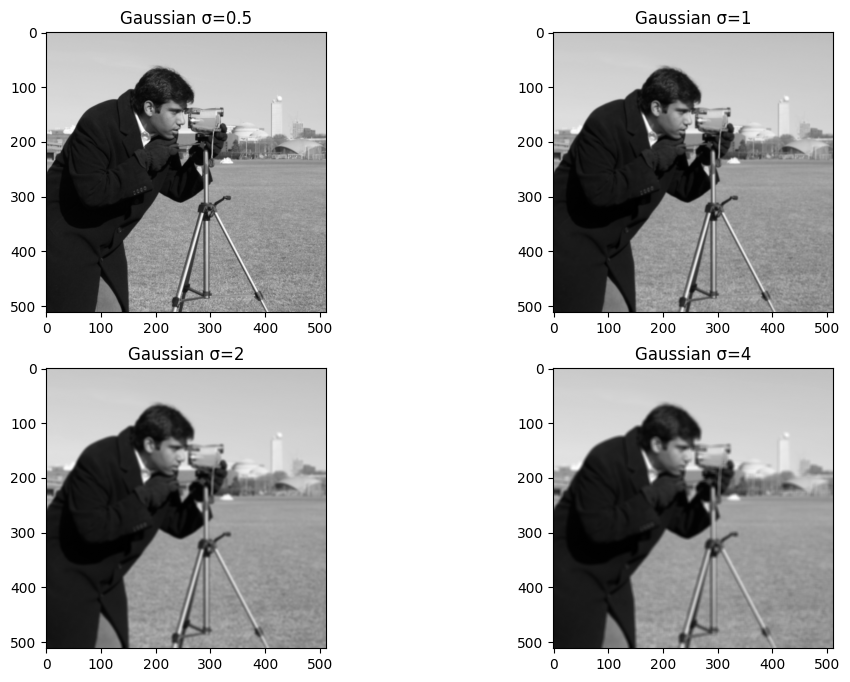

In [15]:
plt.figure(figsize=(12,8))
sigmas=[0.5,1,2,4]
for i,s in enumerate(sigmas):
    # sigma가 커질수록 blur 강해짐
    g = cv2.GaussianBlur(img,(7,7),s)
    plt.subplot(2,2,i+1); plt.imshow(g,cmap='gray'); plt.title(f"Gaussian σ={s}")
plt.show()


**12. Padding 모드 비교**

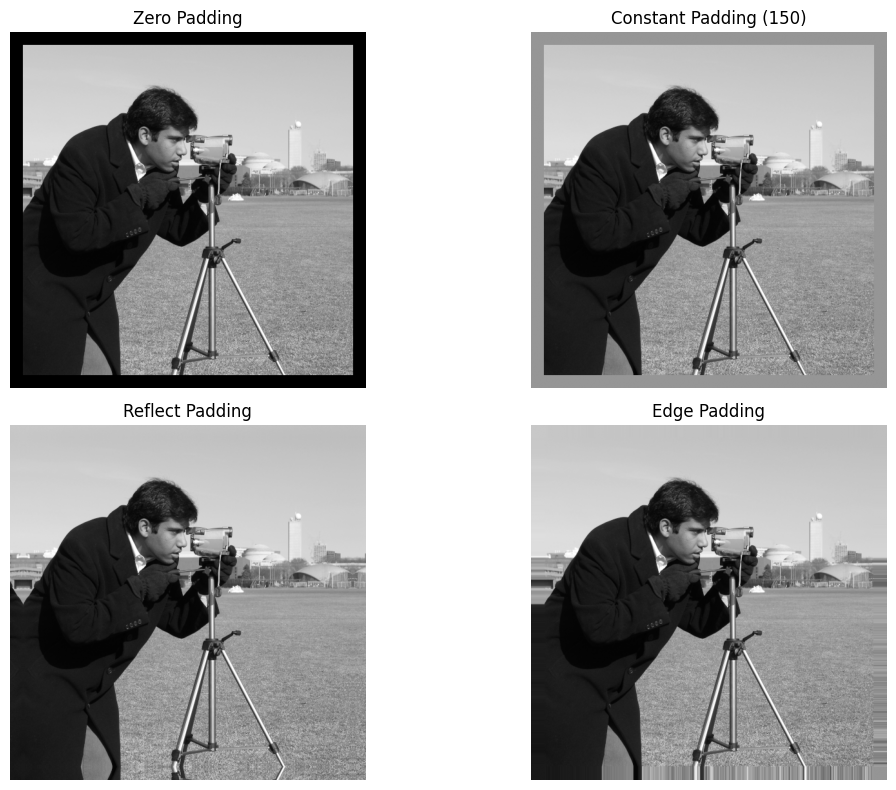

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

img = data.camera()

plt.figure(figsize=(12,8))

# Zero Padding — CNN 기본 방식
zero_pad = np.pad(img, 20, mode='constant', constant_values=0)
plt.subplot(2,2,1)
plt.imshow(zero_pad, cmap='gray')
plt.title("Zero Padding")
plt.axis("off")

# Constant Padding — 임의 값으로 채우기
const_pad = np.pad(img, 20, mode='constant', constant_values=150)
plt.subplot(2,2,2)
plt.imshow(const_pad, cmap='gray')
plt.title("Constant Padding (150)")
plt.axis("off")

# Reflect Padding — 경계 자연스러움 최고
reflect_pad = np.pad(img, 20, mode='reflect')
plt.subplot(2,2,3)
plt.imshow(reflect_pad, cmap='gray')
plt.title("Reflect Padding")
plt.axis("off")

# Edge Padding — 가장자리 값 유지
edge_pad = np.pad(img, 20, mode='edge')
plt.subplot(2,2,4)
plt.imshow(edge_pad, cmap='gray')
plt.title("Edge Padding")
plt.axis("off")

plt.tight_layout()
plt.show()
